# Minimal M/M/1 simulator

This notebook shows how to simulate a M/M/1 model (without using any QueueSim classes).

## Importing modules

In [1]:
# Generating multiple pseudo random numbers as an array
import numpy as np

# Comparison with analytical results
from queuesim.analytic import erlang_c

# Plotting modules
import matplotlib.pyplot as plt
import matplotlib.ticker as formater
import seaborn as sns

# Defining general plot style
sns.set()

## Model parameters

In [2]:
# Means inter-arrival time
mean_i = 100

# Means service time
mean_s = 80

# Number of arrivals to be simulated
count = 5_000_000

## The 4 line simulation code

By exchanging `np.random.exponential` with other random number generators the model can be generalized to G/G/1.

In [3]:
waiting_sum = server_free_at = 0
for (time, s) in zip(np.cumsum(np.random.exponential(mean_i, count)), np.random.exponential(mean_s, count)):
    waiting_sum += max(0, server_free_at - time)
    server_free_at = max(server_free_at, time) + s

## Output simulation result

In [4]:
print("E[W]=", round(waiting_sum / count, 2), sep="")

E[W]=318.98


## Comparison with analytics results (Erlang C)

In [5]:
result = erlang_c(1 / mean_i, 1 / mean_s, 1)

print("E[NQ]=", round(result.ENQ, 2), sep="")
print("E[N]=", round(result.EN, 2), sep="")
print("E[W]=", round(result.EW, 2), sep="")
print("E[V]=", round(result.EV, 2), sep="")
print("\N{greek small letter rho}=", round(result.rho * 100, 1), "%", sep="")

E[NQ]=3.2
E[N]=4.0
E[W]=320.0
E[V]=400.0
ρ=80.0%


## Mean waiting time as a function of the inter-arrival times using the minimal simulator

In [6]:
# Optional: Interactive diagram mode
# Run "pip install ipympl" first
# %matplotlib ipympl

Text(0, 0.5, 'Mean waiting time E[W]')

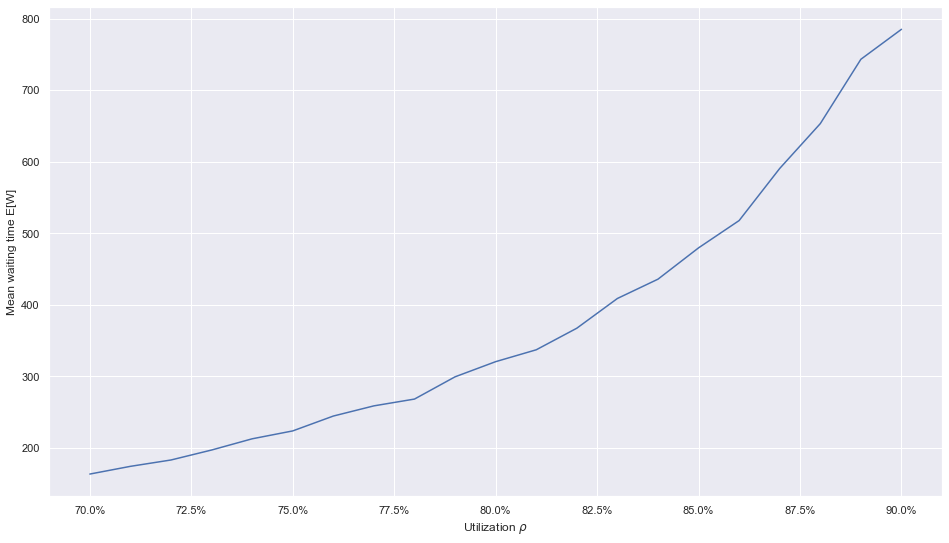

In [7]:
# Simulator as a function
def mm1_sim(mean_i: float, mean_s: float, count: int) -> float:
    waitingSum = server_free_at = 0
    for (time, s) in zip(np.cumsum(np.random.exponential(mean_i, count)), np.random.exponential(mean_s, count)):
        waitingSum += max(0, server_free_at - time)
        server_free_at = max(server_free_at, time) + s
    return waitingSum / count


# Parameters
mean_i = 100
mean_s_range = range(70, 91)
count = 500_000

# Run simulation
rho, EW = zip(*[(mean_s / mean_i, mm1_sim(mean_i, mean_s, count)) for mean_s in mean_s_range])

# Show results
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(rho, EW)
ax.xaxis.set_major_formatter(formater.PercentFormatter(xmax=1, decimals=1))
ax.set_xlabel("Utilization $\\rho$")
ax.set_ylabel("Mean waiting time E[W]")